# 4-Inverse Statistics
---
(Code written as a group by Mohammad Ghoraishi-99100788 and Salarvandian-400100254)

---
Our Objective is to find the distribution of the time it takes for the price of gold to increase<br>
or decrease by a certain amount. (we call this $\tau$)

### Simple Algorithm
---
This problem can be solved simply by iterating through the array and for each point, running the first_instance() function to <br>
find the first instance of price increase or decrease. The functions below do just that.

In [ ]:
# Function that takes an array X, the starting index and a condition function
# Then starting from the start index, iterates over the array to find the first point that the condition is true
function first_instance(start_index, X, condition)
    len = length(X)
    for i in start_index:len
        if condition(X[i])
            return i
        end
        i += 1
    end
    return -1
end

# Function that takes the difference in price and the timeseries, then iterates over the timeseries to find
# the first point where the condition of having an increase if delta is met. All τs are saved and returned in an array
function increase_times(delta, timeseries)
    len = length(timeseries)
    taus = []
    for i in 1:len-1
        cond(x) = (x>timeseries[i]+delta)
        new_idx = first_instance(i, timeseries, cond)
        if new_idx>=0
            push!(taus, new_idx - i)
        end
    end
    return taus
end

# This function is like the previous but instead of an increase in price of size delta, we use the decrease in price
function decrease_times(delta, timeseries)
    len = length(timeseries)
    taus = []
    for i in 1:len-1
        cond(x) = (x<timeseries[i]-delta)
        new_idx = first_instance(i, timeseries, cond)
        if new_idx>=0
            push!(taus, new_idx - i)
        end
    end
    return taus
end

### Load Libraries and Gold Data
---

In [ ]:
using CSV, Plots, DataFrames
GoldData = CSV.read("data/GOLD_dt=0.01666/Abolfazl_0.01666.txt", DataFrame, delim = " ")
Price = GoldData.P

#### Results for 10$
---

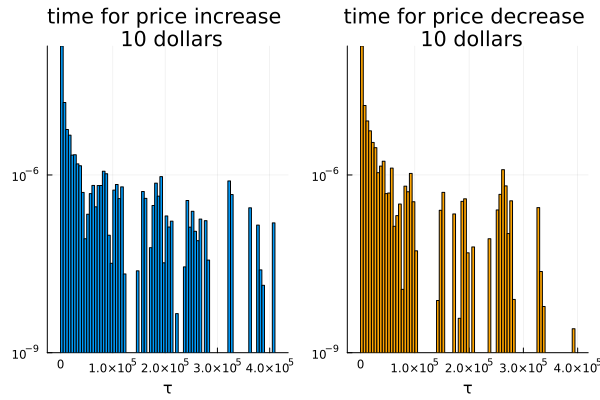

In [ ]:
# for any value delta, the code cell below will calculate both increasing and decreasing times
delta = 10
taus_up = increase_times(delta, Price[6000000:end])
taus_down = decrease_times(delta, Price[6000000:end])
p1 = histogram(taus_up, yaxis = :log, normalize = :pdf, legend = false, title = "time for price increase \n $delta dollars", xlabel = "τ", bins = 100)
p2 = histogram(taus_down, yaxis = :log, normalize = :pdf, legend = false, title = "time for price decrease \n $delta dollars", xlabel = "τ", c = :orange, bins = 100)
plot(p1, p2, layout = 2, figsize = (500, 300))

#### Results for 100$
---

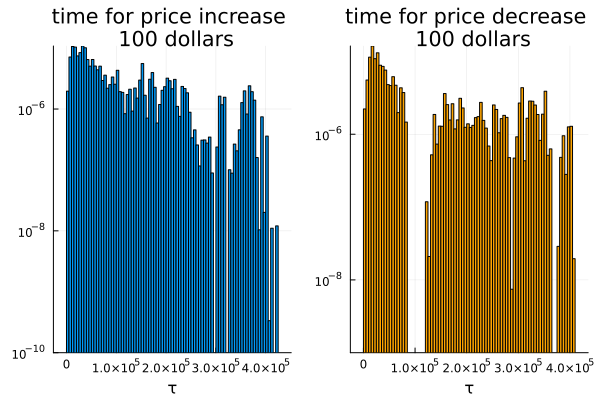

In [43]:
delta = 100
taus_up = increase_times(delta, Price[6000000:end])
taus_down = decrease_times(delta, Price[6000000:end])
p1 = histogram(taus_up, yaxis = :log, normalize = :pdf, legend = false, title = "time for price increase \n $delta dollars", xlabel = "τ", bins = 100)
p2 = histogram(taus_down, yaxis = :log, normalize = :pdf, legend = false, title = "time for price decrease \n $delta dollars", xlabel = "τ", c = :orange, bins = 100)
plot(p1, p2, layout = 2, figsize = (500, 300))